In [1]:
import matplotlib.pyplot as plt
import utils
import numerical_hysteresis
import synthetic
import torch
import numpy as np

In [2]:
n=50
h,m=synthetic.generate_dataset()
x=torch.ones(int(n**2 / 2 + n / 2)).double()
x.requires_grad=True 

h_sat=1.0

xx, yy = utils.generate_mesh(h_sat, n)

states=numerical_hysteresis.state(xx, yy, h_sat, h)


In [3]:
def l(x, h, m, n):

    m_pred = numerical_hysteresis.discreteIntegral(xx, yy, h_sat, 2, x, 
                                                   h, n, states)
    loss = torch.sum((m_pred - m)**2)
    
    return loss

#print(x.shape)
#loss = l(x,h,m,n)
#loss.backward()


In [4]:
def gradient_descent(X0, function, alpha, n_iterations=200):
    """
    Performs 100 iterations of gradient descent
    
    Inputs:
    X0: a pytorch tensor to be modified in-place by the gradient descent algorithm
    function: a callable, that takes X0 as input
    alpha: step size for the gradient descent algorithm
    n_iterations: number of iterations of gradient descent
    
    Returns:
    history_X: array of values of X
    history_f: array of values of f
    """
    history_X = []
    history_f = []
    for iteration in range(n_iterations): # iterations of gradient descent
        f = function(X0, h,m,n)
        
        # Your code that modifies X0 in-place here
        # ...
        f.backward()
        with torch.no_grad():
            X0 -= alpha * X0.grad
        
        X0.grad.zero_()
        
        # Keep a copy in history (do not modify these lines)
        history_X.append( X0.detach().numpy().copy() ) 
        history_f.append( f.detach().numpy().copy() )
        
        if iteration % 100 == 0:
            print(iteration)
        
    return np.array(history_X), np.array(history_f)

0
100
200
300
400
500
600
700
800
900
0.022226134


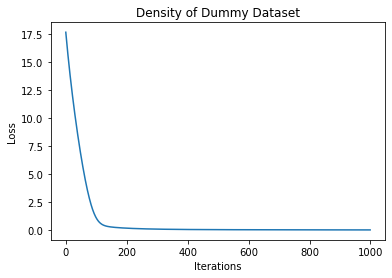

In [5]:
# Test your code by executing the code below
alpha = .50
num_iterations = 1000

history_X, history_f = gradient_descent( x, l, alpha, num_iterations)
x_star = torch.tensor(history_X[-1]).double()
x_start = torch.tensor(history_X[0]).double()
m_pred = numerical_hysteresis.discreteIntegral(xx, yy, h_sat, 2, x_star, h, n, states)
m_start = numerical_hysteresis.discreteIntegral(xx, yy, h_sat, 2, x_start, h, n, states)

# Plot the trajectory of the points
#plt.scatter( history_X[:,0], history_X[:,1], c=np.arange(len(history_X)))
plt.plot(history_f)
plt.title('Density of Dummy Dataset')
plt.xlabel('Iterations')
plt.ylabel('Loss')
# plt.xlim(-1, 1)
# plt.ylim(-1, 1)

print(history_f[-1])

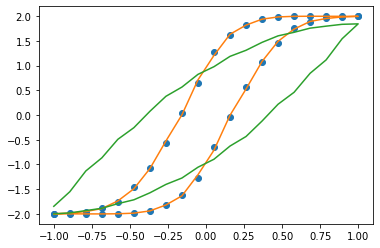

In [6]:
plt.plot(h, m, 'o')
plt.plot(h,m_pred)
plt.plot(h, m_start)
plt.show()

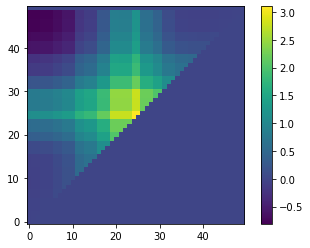

In [7]:
mat=utils.vector_to_tril(torch.tensor(history_X[-1]).double(), n)
plt.imshow(mat, origin="lower")
plt.colorbar()